## SGD: Weighted samples
Source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

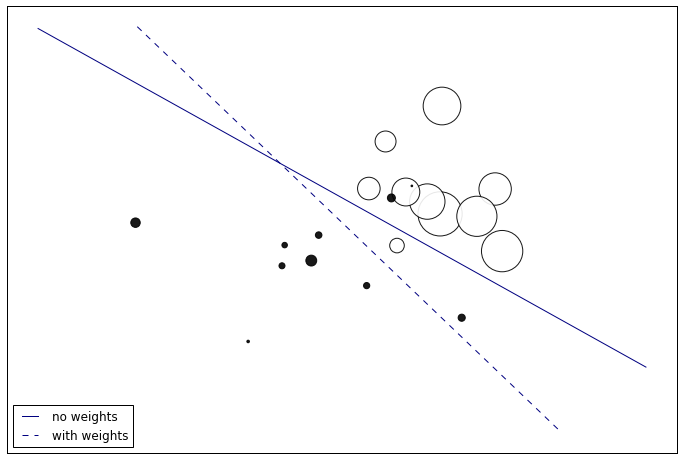

In [23]:
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=sample_weight, alpha=0.9,
            cmap=plt.cm.bone)

clf = linear_model.SGDClassifier(alpha = 0.01, n_iter = 100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels = [0], linestyles=['solid'])

clf = linear_model.SGDClassifier(alpha = 0.01, n_iter = 100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels = [0], linestyles=['dashed'])

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")
plt.xticks(())
plt.yticks(())
plt.legend(loc='better')